# 1.0 Data Ingestion

In [18]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('../artifacts/dataset/fetched_hardware_data.csv')
df

,Humidity,Temperature,DateTime,Rain
0,73,26.1,10-11-2024 00:00,4095
1,73,26.1,10-11-2024 01:00,3671
2,73,26.1,10-11-2024 02:00,3671
3,73,26.1,10-11-2024 03:00,3671
4,73,26.1,10-11-2024 04:00,3803
5,73,26.1,10-11-2024 05:00,3803
6,73,26.1,10-11-2024 06:00,3803
7,73,26.1,10-11-2024 07:00,3803
8,73,26.1,10-11-2024 08:00,3600
9,73,26.1,10-11-2024 09:00,3600


In [20]:
# from datetime import datetime, timedelta

# # Sample DataFrame
# data = {
#     'Humidity': [73] * 20,
#     'Temperature': [26.1] * 10 + [26.2] * 10,
#     'DateTime': [np.nan] * 19 + ["2024-11-17 19:48:17"],
#     'Rain_mm': [0.0000, 3.1800, 3.1800, 3.1800, 2.1900, 2.1900, 2.1900, 2.1900, 3.7125, 3.7125, 
#                 3.4200, 3.4200, 3.4200, 3.4200, 3.4200, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
# }
# df = pd.DataFrame(data)

# # Convert DateTime column to datetime, keeping NaN as is
# df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# # Set the start date and define the step interval (e.g., 1 hour)
# start_date = datetime(2024, 11, 10)
# step_interval = timedelta(hours=1)

# # Generate sequential dates for NaN values
# current_time = start_date
# for i in range(len(df)):
#     if pd.isna(df.loc[i, 'DateTime']):
#         df.loc[i, 'DateTime'] = current_time
#         current_time += step_interval

# # Print the updated DataFrame
# df

In [21]:
# df.to_csv('../artifacts/dataset/fetched_hardware_data.csv', index=False)

## 1.1 Rain Logic 
Rainfall (mm) = k * (4095 - rain_value)

* rainValue = 3000 -> 5 mm
* rainValue = 1000 -> 20 mm

k = (20 - 5) / (3000m- 1000) = 0.0075 mm per unit

In [22]:
# rain_values to rain_mm
df['Rain_mm'] = 0.0075 * (4095 - df['Rain'])
df.drop(columns=['Rain'], inplace=True)
df

,Humidity,Temperature,DateTime,Rain_mm
0,73,26.1,10-11-2024 00:00,0.0000
1,73,26.1,10-11-2024 01:00,3.1800
2,73,26.1,10-11-2024 02:00,3.1800
3,73,26.1,10-11-2024 03:00,3.1800
4,73,26.1,10-11-2024 04:00,2.1900
5,73,26.1,10-11-2024 05:00,2.1900
6,73,26.1,10-11-2024 06:00,2.1900
7,73,26.1,10-11-2024 07:00,2.1900
8,73,26.1,10-11-2024 08:00,3.7125
9,73,26.1,10-11-2024 09:00,3.7125


## 1.2 Date Time Index

In [ ]:
# Convert datetime to to correct format as per Open-Mateo Dataset
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M', dayfirst=True)
df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

# Convert DateTime to index
df.index = df['DateTime']
df.drop(columns=['DateTime'], inplace=True)
df

,Humidity,Temperature,Rain_mm
DateTime,,,
2024-11-10 00:00:00,73,26.1,0.0000
2024-11-10 01:00:00,73,26.1,3.1800
2024-11-10 02:00:00,73,26.1,3.1800
2024-11-10 03:00:00,73,26.1,3.1800
2024-11-10 04:00:00,73,26.1,2.1900
2024-11-10 05:00:00,73,26.1,2.1900
2024-11-10 06:00:00,73,26.1,2.1900
2024-11-10 07:00:00,73,26.1,2.1900
2024-11-10 08:00:00,73,26.1,3.7125


In [25]:
# Rename columns in the DataFrame
df = df.rename(columns={
    'Humidity': 'relative_humidity_2m',
    'Temperature': 'temperature_2m',
    'Rain_mm': 'rain'
})
df.head()

,relative_humidity_2m,temperature_2m,rain
DateTime,,,
2024-11-10 00:00:00,73,26.1,0.00
2024-11-10 01:00:00,73,26.1,3.18
2024-11-10 02:00:00,73,26.1,3.18
2024-11-10 03:00:00,73,26.1,3.18
2024-11-10 04:00:00,73,26.1,2.19


## 1.3 Rain Plot

In [26]:
df_hist = pd.read_csv('../artifacts/dataset/01-hourly_historical_analyzed_data.csv')
df_hist = df_hist.drop(columns=['hour', 'day', 'month', 'year'])
df_hist

,time,temperature_2m,relative_humidity_2m,dew_point_2m,rain,cloud_cover_low,cloud_cover_mid,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_gusts_10m
0,2000-01-01 00:00:00,4.0,96,3.3,0.0,0,0,0.00,0.04,3.8,3.6,11.5
1,2000-01-01 01:00:00,4.1,95,3.3,0.0,0,1,0.00,0.04,4.1,4.4,11.9
2,2000-01-01 02:00:00,4.0,95,3.2,0.0,0,1,0.01,0.04,3.8,4.5,11.9
3,2000-01-01 03:00:00,6.5,92,5.3,0.0,0,3,0.02,0.07,4.3,4.0,13.0
4,2000-01-01 04:00:00,12.9,75,8.6,0.0,0,0,0.13,0.37,2.0,2.5,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
217699,2024-10-31 19:00:00,17.1,84,14.4,0.0,0,0,0.00,0.31,4.6,7.9,8.6
217700,2024-10-31 20:00:00,17.2,80,13.8,0.0,0,0,0.00,0.39,3.3,4.6,7.2
217701,2024-10-31 21:00:00,17.3,77,13.2,0.0,0,0,0.00,0.46,3.1,2.6,5.8
217702,2024-10-31 22:00:00,16.8,78,13.0,0.0,0,0,0.00,0.42,4.8,4.3,6.8


In [27]:
df_hist1 = df_hist[['time', 'temperature_2m', 'relative_humidity_2m', 'rain']]
df_hist1

,time,temperature_2m,relative_humidity_2m,rain
0,2000-01-01 00:00:00,4.0,96,0.0
1,2000-01-01 01:00:00,4.1,95,0.0
2,2000-01-01 02:00:00,4.0,95,0.0
3,2000-01-01 03:00:00,6.5,92,0.0
4,2000-01-01 04:00:00,12.9,75,0.0
...,...,...,...,...
217699,2024-10-31 19:00:00,17.1,84,0.0
217700,2024-10-31 20:00:00,17.2,80,0.0
217701,2024-10-31 21:00:00,17.3,77,0.0
217702,2024-10-31 22:00:00,16.8,78,0.0


In [28]:
df_hist1.index = pd.to_datetime(df_hist1['time'], format='%Y-%m-%d %H:%M:%S')
df_hist1.drop(columns=['time'], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13328\1757409117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist1.drop(columns=['time'], inplace=True)


<Axes: xlabel='time'>

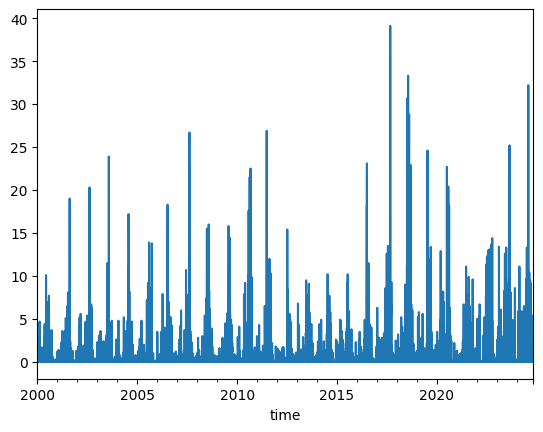

In [29]:
rain = df_hist1['rain']
rain.plot()

# 2.0 Data Preprocessing

In [30]:
rain_df = pd.DataFrame({'Rain': rain})

rain_df['Seconds'] = rain_df.index.map(pd.Timestamp.timestamp)

In [31]:
day = 24 * 60 * 60
year = (365.2425) * day

rain_df['Day sin'] = np.sin(rain_df['Seconds'] * (2 * np.pi / day))
rain_df['Day cos'] = np.cos(rain_df['Seconds'] * (2 * np.pi / day))
rain_df['Year sin'] = np.sin(rain_df['Seconds'] * (2 * np.pi / year))
rain_df['Year cos'] = np.cos(rain_df['Seconds'] * (2 * np.pi / year))

rain_df = rain_df.drop(['Seconds'], axis=1)

In [32]:
def df_to_X_y(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i: i + window_size]]
        X.append(row)
        
        label = df_as_np[i + window_size][0]
        y.append(label)
    
    return np.array(X), np.array(y)

X, y = df_to_X_y(rain_df)
X.shape, y.shape

((217698, 6, 5), (217698,))

In [33]:
df_hist2 = pd.concat([df_hist1, rain_df], axis=1)
df_hist2 = df_hist2.drop(['rain'], axis=1)
df_hist2

,temperature_2m,relative_humidity_2m,Rain,Day sin,Day cos,Year sin,Year cos
time,,,,,,,
2000-01-01 00:00:00,4.0,96,0.0,-5.461913e-12,1.000000,-0.004731,0.999989
2000-01-01 01:00:00,4.1,95,0.0,2.588190e-01,0.965926,-0.004014,0.999992
2000-01-01 02:00:00,4.0,95,0.0,5.000000e-01,0.866025,-0.003297,0.999995
2000-01-01 03:00:00,6.5,92,0.0,7.071068e-01,0.707107,-0.002580,0.999997
2000-01-01 04:00:00,12.9,75,0.0,8.660254e-01,0.500000,-0.001864,0.999998
...,...,...,...,...,...,...,...
2024-10-31 19:00:00,17.1,84,0.0,-9.659258e-01,0.258819,-0.863191,0.504877
2024-10-31 20:00:00,17.2,80,0.0,-8.660254e-01,0.500000,-0.862829,0.505496
2024-10-31 21:00:00,17.3,77,0.0,-7.071068e-01,0.707107,-0.862466,0.506114


In [34]:
X, y = df_to_X_y(df_hist2, window_size=8)
X.shape, y.shape

((217696, 8, 7), (217696,))

In [35]:
X_train, y_train = X[:200000], y[:200000]
X_val, y_val = X[200000:209000], y[200000:209000]
X_test, y_test = X[209000:], y[209000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((200000, 8, 7), (200000,), (9000, 8, 7), (9000,), (8696, 8, 7), (8696,))

In [36]:
rain_training_mean = np.mean(X_train[:, :, 0])
rain_training_std = np.std(X_train[:, :, 0])

def preprocess_standardize(X):
    X[:, :, 0] = (X[:, :, 0] - rain_training_mean) / rain_training_std
    return X

preprocess_standardize(X_train)
preprocess_standardize(X_val)
preprocess_standardize(X_test)

array([[[ 6.18286181e-01,  4.40000000e+01,  0.00000000e+00, ...,
         -5.00000000e-01, -8.38029166e-01,  5.45625436e-01],
        [ 5.64749468e-01,  4.30000000e+01,  0.00000000e+00, ...,
         -7.07106781e-01, -8.37637856e-01,  5.46225980e-01],
        [ 4.44291861e-01,  4.60000000e+01,  0.00000000e+00, ...,
         -8.66025404e-01, -8.37246116e-01,  5.46826244e-01],
        ...,
        [-4.65832275e-01,  8.10000000e+01,  0.00000000e+00, ...,
         -9.65925826e-01, -8.36068315e-01,  5.48625348e-01],
        [-6.26442416e-01,  8.40000000e+01,  0.00000000e+00, ...,
         -8.66025404e-01, -8.35674855e-01,  5.49224486e-01],
        [-7.33515844e-01,  8.40000000e+01,  0.00000000e+00, ...,
         -7.07106781e-01, -8.35280966e-01,  5.49823342e-01]],

       [[ 5.64749468e-01,  4.30000000e+01,  0.00000000e+00, ...,
         -7.07106781e-01, -8.37637856e-01,  5.46225980e-01],
        [ 4.44291861e-01,  4.60000000e+01,  0.00000000e+00, ...,
         -8.66025404e-01, -8.37246116e

In [37]:
def preprocess__standardize_output(y):
    # Check if y is 1D or 2D
    if len(y.shape) == 2:  # If it's 2D (like a column vector), you can index it
        y[:, 0] = (y[:, 0] - rain_training_mean) / rain_training_std
    else:  # If it's 1D, you don't need the extra index
        y = (y - rain_training_mean) / rain_training_std
    return y

preprocess__standardize_output(y_train)
preprocess__standardize_output(y_val)
preprocess__standardize_output(y_test)

array([-0.82720509, -0.88074181, -0.89412599, ..., -0.42567974,
       -0.49260063, -0.50598481])

In [ ]:
import joblib
from pathlib import Path

scaler = StandardScaler()

# Reshape the 3D array to 2D (combine samples and timesteps)
num_samples, num_timesteps, num_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, num_features)

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Reshape back to 3D
X_train = X_train_scaled.reshape(num_samples, num_timesteps, num_features)

# Repeat for validation and test datasets
X_val_reshaped = X_val.reshape(-1, num_features)
X_val_scaled = scaler.transform(X_val_reshaped)
X_val = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(-1, num_features)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test = X_test_scaled.reshape(X_test.shape)

print("Scaling completed!")

# Create directory if it doesn't exist
save_dir = Path('../artifacts/scalers/hardware_model')
save_dir.mkdir(parents=True, exist_ok=True)

# Save the fitted scaler
scaler_path = save_dir / 'scaler.save'
joblib.dump(scaler, scaler_path)

print(f"Scaling completed and scaler saved to {scaler_path}!")

Scaling completed!
Scaling completed and scaler saved to ..\artifacts\sclaers\hardware_model\scaler.save!


# 3.0 Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [20]:
def train_model(model, checkpoint_path, X_train, y_train, X_val, y_val, epochs=2, learning_rate=0.0001):
    """
    Function to compile and train a model with specified parameters.
    
    Args:
    - model: The Keras model to be trained.
    - checkpoint_path: File path to save the best model during training.
    - X_train, y_train: Training data and labels.
    - X_val, y_val: Validation data and labels.
    - epochs: Number of epochs for training (default: 2).
    - learning_rate: Learning rate for the optimizer (default: 0.0001).
    
    Returns:
    - history: Training history object.
    """
    # Define the model checkpoint
    checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True)

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=MeanSquaredError(),
        metrics=[RootMeanSquaredError()]
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[checkpoint]
    )

    return history

In [21]:
def plot_predictions(model, X_data, y_data, label, start=50, end=500, ylabel='Rainfall (mm)', title_suffix=''):
    """
    Plots predictions vs actual values for a given model and dataset.
    
    Args:
    - model: The trained model to use for predictions.
    - X_data: Input data for predictions.
    - y_data: Actual target values.
    - label: A string indicating the dataset (e.g., 'Train', 'Validation', 'Test').
    - start, end: Range of data points to visualize (default: 50 to 500).
    - ylabel: Label for the y-axis (default: 'Rainfall (mm)').
    - title_suffix: Additional suffix for the title (optional).
    
    Returns:
    - A DataFrame containing the predictions and actual values.
    """
    # Make predictions
    predictions = model.predict(X_data).flatten()

    # Create a DataFrame to store results
    results_df = pd.DataFrame(data={f'{label} Predictions': predictions, 'Actual Values': y_data})
    print(results_df)

    # Plot the predictions and actual values
    plt.figure(figsize=(10, 6))
    plt.plot(results_df[f'{label} Predictions'][start:end], label=f'{label} Predictions', color='blue', linestyle='-')
    plt.plot(results_df['Actual Values'][start:end], label='Actual Values', color='orange', linestyle='--')

    # Add labels and title
    plt.xlabel('Time Stamps', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(f'{label} Predictions vs Actual Values {title_suffix}', fontsize=14)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    return results_df

## 3.1 LSTM

In [22]:
model_lstm = Sequential([
    InputLayer((8, 7)),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, 'relu'),
    Dense(8, 'relu'),
    Dense(1, 'linear')
])

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,521 (123.13 KB)

 Trainable params: 31,521 (123.13 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history_lstm = train_model(
    model=model_lstm,
    checkpoint_path='../artifacts/models/hardware_model/model_lstm.keras',
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    epochs=2
)

Epoch 1/2
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - loss: 73.8114 - root_mean_squared_error: 7.6908 - val_loss: 11.6991 - val_root_mean_squared_error: 3.4204
Epoch 2/2
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - loss: 2.4890 - root_mean_squared_error: 1.5761 - val_loss: 16.1448 - val_root_mean_squared_error: 4.0181


In [24]:
model_lstm = load_model('../artifacts/models/hardware_model/model_lstm.keras')

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
        Train Predictions  Actual Values
0               15.497793           17.0
1               14.958799           16.9
2               14.242775           16.5
3               13.299364           15.6
4               12.117901           14.4
...                   ...            ...
199995          19.479275           23.0
199996          18.533796           20.8
199997          17.589575           21.3
199998          16.710304           19.6
199999          15.776226           16.0

[200000 rows x 2 columns]


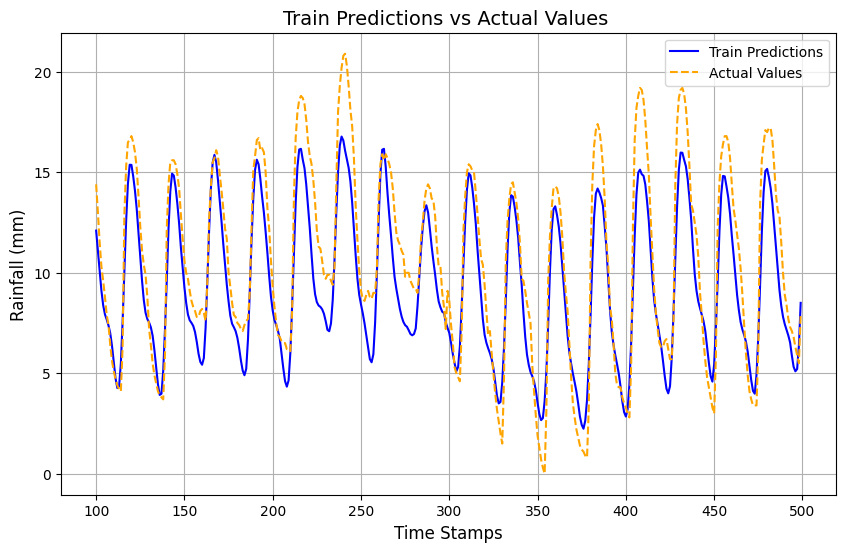

In [25]:
train_results = plot_predictions(
    model=model_lstm, 
    X_data=X_train, 
    y_data=y_train, 
    label='Train', 
    start=100, 
    end=500
)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
      Val Predictions  Actual Values
0           14.711173           15.6
1           13.659208           15.4
2           13.051220           15.5
3           12.768030           16.9
4           12.323067           18.1
...               ...            ...
8995        19.180759           21.9
8996        18.090784           19.4
8997        17.050062           17.0
8998        15.856708           15.8
8999        14.531704           15.0

[9000 rows x 2 columns]


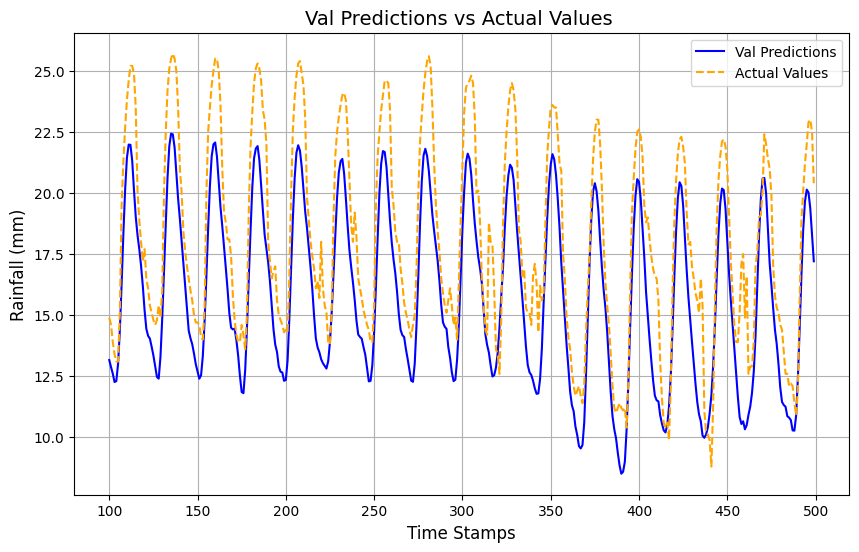

In [26]:
val_results = plot_predictions(
    model=model_lstm, 
    X_data=X_val, 
    y_data=y_val, 
    label='Val', 
    start=100, 
    end=500
)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
      Test Predictions  Actual Values
0            13.121107           14.3
1            12.019572           13.9
2            11.557818           13.8
3            11.482344           13.5
4            11.074976           12.9
...                ...            ...
8691         14.673864           17.1
8692         14.207427           17.2
8693         13.882729           17.3
8694         13.655725           16.8
8695         13.529691           16.7

[8696 rows x 2 columns]


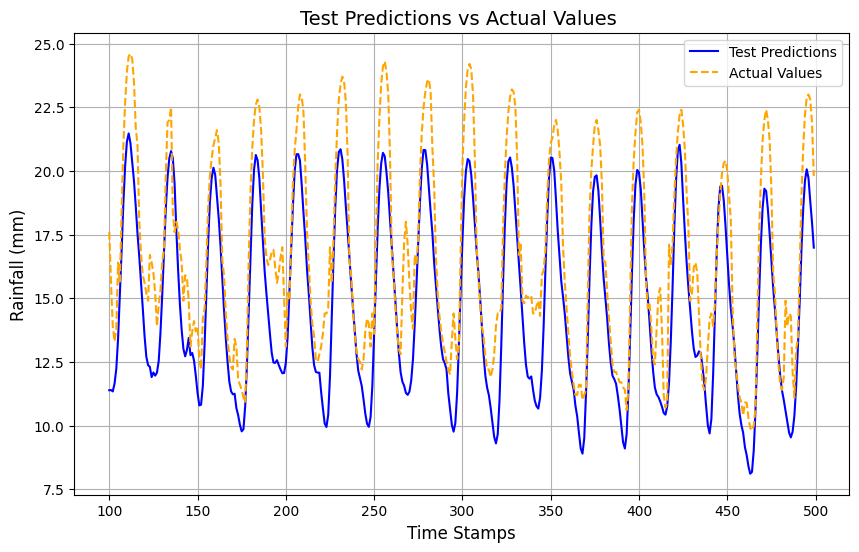

In [27]:
test_results = plot_predictions(
    model=model_lstm, 
    X_data=X_test, 
    y_data=y_test, 
    label='Test', 
    start=100, 
    end=500
)

## 3.2 GRU

In [28]:
model_gru = Sequential([
    InputLayer((8, 7)),
    GRU(64, activation='relu', return_sequences=True),
    GRU(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, 'relu'),
    Dense(8, 'relu'),
    Dense(1, 'linear')
])

model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 8, 64)          │        14,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,097 (94.13 KB)

 Trainable params: 24,097 (94.13 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_gru = train_model(
    model=model_gru,
    checkpoint_path='../artifacts/models/hardware_model/model_gru.keras',
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    epochs=2
)

Epoch 1/2
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - loss: 75.5757 - root_mean_squared_error: 7.7666 - val_loss: 10.8576 - val_root_mean_squared_error: 3.2951
Epoch 2/2
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - loss: 2.7450 - root_mean_squared_error: 1.6544 - val_loss: 15.0386 - val_root_mean_squared_error: 3.8780


In [30]:
model_gru = load_model('../artifacts/models/hardware_model/model_gru.keras')

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step
        Train Predictions  Actual Values
0               15.166526           17.0
1               14.729404           16.9
2               13.947161           16.5
3               12.904263           15.6
4               11.829571           14.4
...                   ...            ...
199995          19.839312           23.0
199996          18.885668           20.8
199997          17.619781           21.3
199998          16.536413           19.6
199999          15.533918           16.0

[200000 rows x 2 columns]


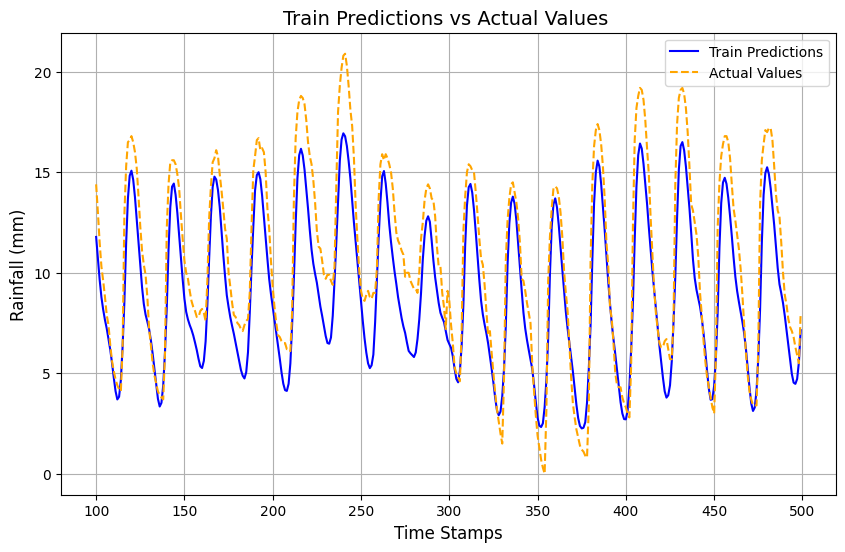

In [31]:
train_results = plot_predictions(
    model=model_gru, 
    X_data=X_train, 
    y_data=y_train, 
    label='Train', 
    start=100, 
    end=500
)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
      Val Predictions  Actual Values
0           14.363217           15.6
1           13.442236           15.4
2           12.755648           15.5
3           12.346977           16.9
4           12.314396           18.1
...               ...            ...
8995        19.705099           21.9
8996        18.506229           19.4
8997        17.060633           17.0
8998        15.322447           15.8
8999        13.844174           15.0

[9000 rows x 2 columns]


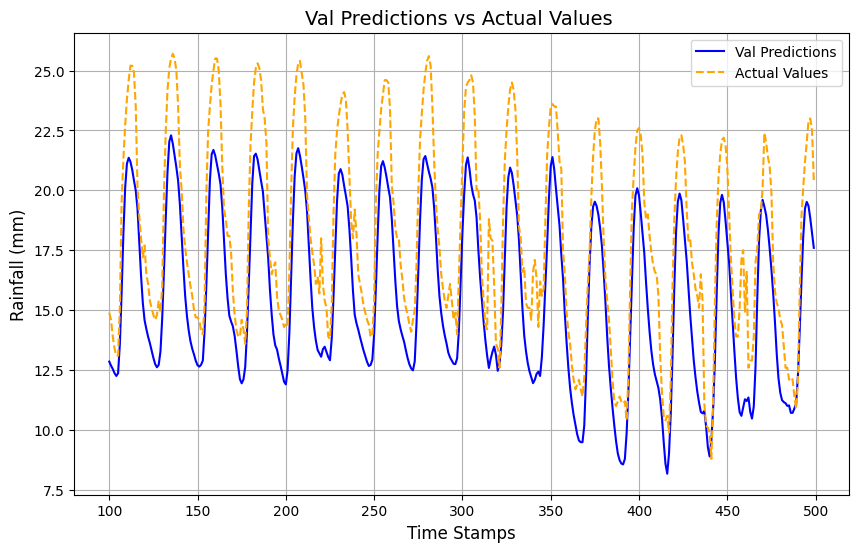

In [32]:
val_results = plot_predictions(
    model=model_gru, 
    X_data=X_val, 
    y_data=y_val, 
    label='Val', 
    start=100, 
    end=500
)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
      Test Predictions  Actual Values
0            12.749028           14.3
1            11.987797           13.9
2            11.490559           13.8
3            11.126301           13.5
4            10.889411           12.9
...                ...            ...
8691         14.444960           17.1
8692         14.167461           17.2
8693         14.048264           17.3
8694         14.086143           16.8
8695         14.015839           16.7

[8696 rows x 2 columns]


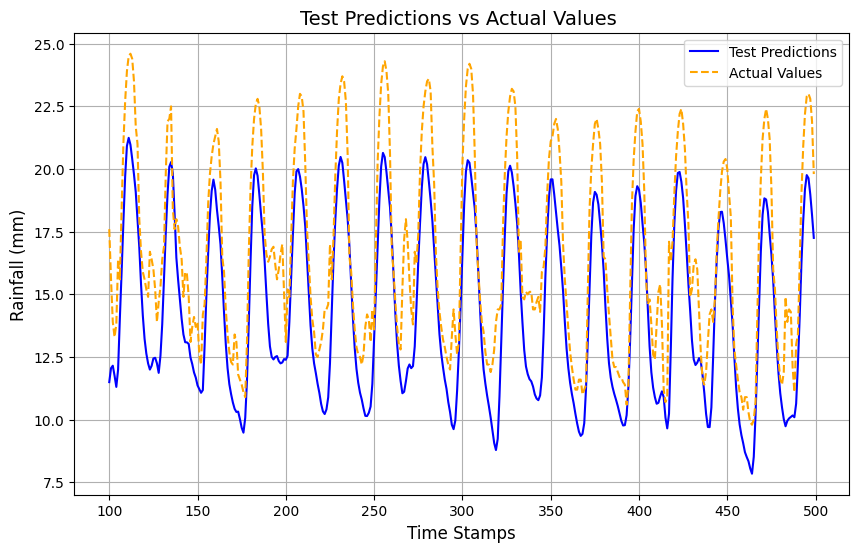

In [33]:
test_results = plot_predictions(
    model=model_gru, 
    X_data=X_test, 
    y_data=y_test, 
    label='Test', 
    start=100, 
    end=500
)

## 3.3 CNN 1D

In [34]:
model_cnn_1d = Sequential([
    InputLayer((8, 7)),
    Conv1D(64, kernel_size=2, activation='relu'),
    Conv1D(32, kernel_size=2, activation='relu'),
    GlobalAveragePooling1D(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, 'relu'),
    Dense(1, 'linear')
])

model_cnn_1d.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,761 (22.50 KB)

 Trainable params: 5,761 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_cnn_1d = train_model(
    model=model_cnn_1d,
    checkpoint_path='../artifacts/models/hardware_model/model_cnn_1d.keras',
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    epochs=2
)

Epoch 1/2
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 90.6250 - root_mean_squared_error: 8.6848 - val_loss: 3.5208 - val_root_mean_squared_error: 1.8764
Epoch 2/2
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 5.5983 - root_mean_squared_error: 2.3654 - val_loss: 6.0976 - val_root_mean_squared_error: 2.4693


In [36]:
model_cnn_1d = load_model('../artifacts/models/hardware_model/model_cnn_1d.keras')

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
        Train Predictions  Actual Values
0               16.285315           17.0
1               16.074760           16.9
2               15.404257           16.5
3               14.309034           15.6
4               12.992514           14.4
...                   ...            ...
199995          22.307613           23.0
199996          20.960518           20.8
199997          19.777954           21.3
199998          18.857306           19.6
199999          18.086269           16.0

[200000 rows x 2 columns]


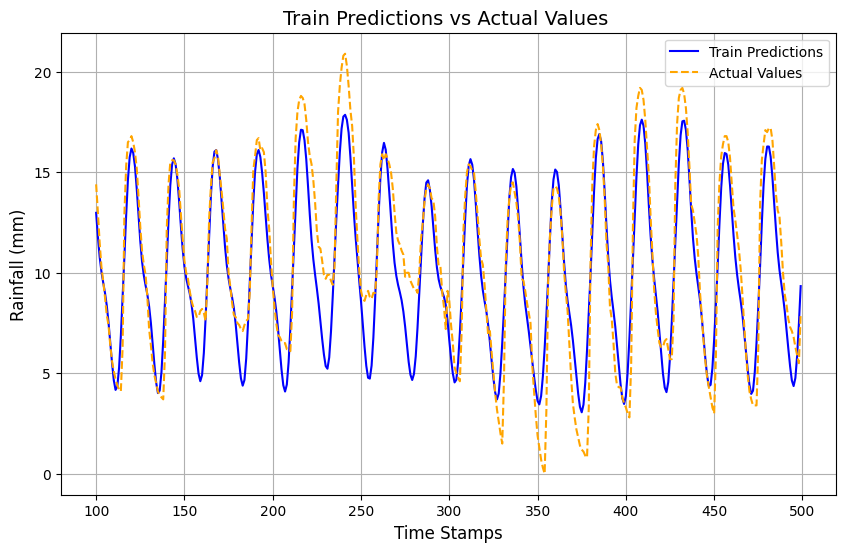

In [37]:
train_results = plot_predictions(
    model=model_cnn_1d, 
    X_data=X_train, 
    y_data=y_train, 
    label='Train', 
    start=100, 
    end=500
)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
      Val Predictions  Actual Values
0           17.293158           15.6
1           16.412870           15.4
2           15.488958           15.5
3           14.462327           16.9
4           13.547209           18.1
...               ...            ...
8995        21.628771           21.9
8996        20.224932           19.4
8997        18.929838           17.0
8998        17.774252           15.8
8999        16.659210           15.0

[9000 rows x 2 columns]


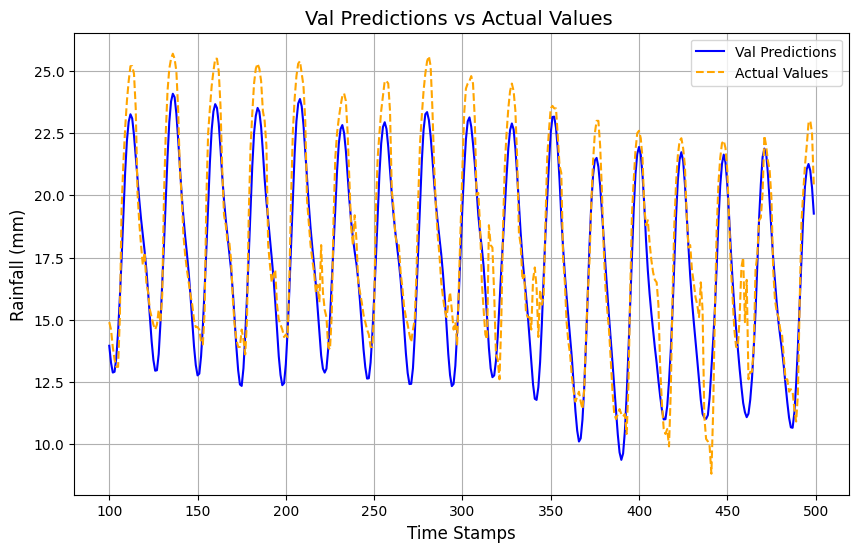

In [38]:
val_results = plot_predictions(
    model=model_cnn_1d, 
    X_data=X_val, 
    y_data=y_val, 
    label='Val', 
    start=100, 
    end=500
)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
      Test Predictions  Actual Values
0            15.673483           14.3
1            14.734188           13.9
2            13.837197           13.8
3            12.854601           13.5
4            11.971345           12.9
...                ...            ...
8691         15.396762           17.1
8692         14.389376           17.2
8693         13.722036           17.3
8694         13.463904           16.8
8695         13.681734           16.7

[8696 rows x 2 columns]


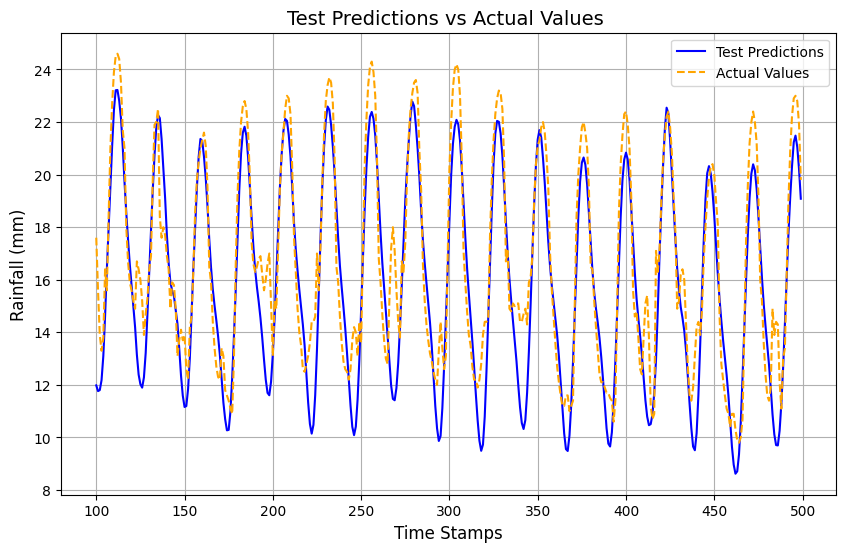

In [39]:
test_results = plot_predictions(
    model=model_cnn_1d, 
    X_data=X_test, 
    y_data=y_test, 
    label='Test', 
    start=100, 
    end=500
)